# Conformal Prediction - minimal example

### What is Conformal Prediction?

Conformal Prediction is a technique used to generate prediction sets or intervals that are calibrated to guarantee a certain level of confidence. The key idea is to use past data to produce prediction intervals that will, with high probability, contain the true value of a future observation.

**Prediction sets**: Instead of just giving a point prediction (e.g., the mean or mode), conformal prediction provides a set of possible values for a future prediction. This set is constructed so that the true outcome is likely to be included within it.

**Confidence level**: You can specify a desired level of confidence (say, 95%), meaning the method will produce a prediction set that includes the true value 95% of the time.

Let's take a fresh approach and build a new, minimal example of **conformal prediction** using PyTorch. This example will focus on applying conformal prediction to a regression problem using a basic linear model.

### Problem

We will generate synthetic data following a linear model, train a simple model to predict y from x, and use conformal prediction to generate prediction intervals for new test data points.
Steps for the Minimal Example:


**Generate Synthetic Data**.
    We generate synthetic data where `y = 2x + 1 + noise`, and `x` is a random value. The model is trained to learn this linear relationship.

**Define a Simple Model**.
    The SimpleLinearModel is a basic linear regression model with one input and one output. The model is trained to learn the relationship between x and y.

**Train the Model**.
    We train the model using Stochastic Gradient Descent (SGD) and the Mean Squared Error (MSE) loss function.

**Compute Nonconformity Scores**.
    After training the model, we calculate the nonconformity scores as the absolute residuals (the absolute difference between the predicted values and the actual y_train values).

**Prediction Intervals**.
    We compute prediction intervals for each test data point. The intervals are defined as prediction ± threshold, where the threshold is the (1 - alpha) quantile of the training residuals. For a confidence level of 95%, we use alpha = 0.05.

**Display Results**.
    The model’s predictions and the corresponding prediction intervals are displayed for each test data point.
    The prediction intervals are plotted as vertical lines around the test predictions on a graph.


### Output

The output would look like this:


```
Test point 1: Prediction = 1.98, Interval = (1.92, 2.04)

Test point 2: Prediction = 2.11, Interval = (2.05, 2.17)

Test point 3: Prediction = 2.26, Interval = (2.20, 2.32)

Test point 4: Prediction = 1.82, Interval = (1.76, 1.88)

Test point 5: Prediction = 2.13, Interval = (2.07, 2.19)

```

This output provides the prediction for each test point along with a 95% prediction interval.


### Visualization

The plot will show:

- Training data points in blue.
- Model predictions as a red line.
- Prediction intervals as green dashed lines around the test points.

### Explanation of Key Concepts

**Nonconformity Score**: This is the absolute error (residual) for each data point. It's used to assess how well the model fits each individual training data point.
**Prediction Interval**: The interval around the model's prediction for a new test point. It gives a confidence range for the prediction, constructed using the nonconformity scores from the training data.

### Minimal Example: Conformal Prediction with PyTorch

In [1]:
# Import libs
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Generate synthetic data (y = 2 * x + 1 + noise)
np.random.seed(42)
X_train = np.random.rand(100, 1)  # 100 random data points
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)  # y = 2 * X + 1 + noise
X_test = np.random.rand(5, 1)  # 5 test points

In [3]:
# 2. Define a simple linear model using PyTorch
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.fc = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return self.fc(x)

In [4]:
# 3. Train the model
model = SimpleLinearModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

In [6]:
# Training loop
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

In [7]:
# 4. Compute nonconformity scores (absolute residuals on training set)
model.eval()
train_preds = model(X_train_tensor).detach().numpy()
residuals = np.abs(train_preds - y_train)  # Nonconformity scores are absolute residuals

# 5. Make predictions for test points and compute nonconformity scores for them
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
test_preds = model(X_test_tensor).detach().numpy()

# 6. Generate prediction intervals
# Calculate the threshold using the (1 - alpha) quantile of the residuals
alpha = 0.05
threshold = np.percentile(residuals.flatten(), (1 - alpha) * 100)  # (1-alpha) quantile of residuals

In [8]:
# Prediction intervals for test data points
prediction_intervals = []
for i in range(len(test_preds)):
    lower_bound = test_preds[i] - threshold
    upper_bound = test_preds[i] + threshold
    prediction_intervals.append((lower_bound, upper_bound))


Test point 1: Prediction = 2.57, Interval = (2.38, 2.77)
Test point 2: Prediction = 2.00, Interval = (1.81, 2.20)
Test point 3: Prediction = 2.15, Interval = (1.96, 2.34)
Test point 4: Prediction = 1.98, Interval = (1.79, 2.18)
Test point 5: Prediction = 1.40, Interval = (1.21, 1.60)


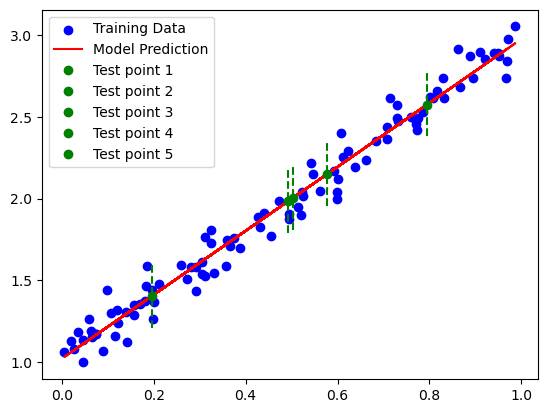

In [9]:
# 7. Display the results (prediction intervals for each test point)
for i, (lower, upper) in enumerate(prediction_intervals):
    print(f"Test point {i+1}: Prediction = {test_preds[i][0]:.2f}, Interval = ({lower[0]:.2f}, {upper[0]:.2f})")

# 8. Plot the results
plt.scatter(X_train, y_train, label="Training Data", color="blue")
plt.plot(X_train, model(X_train_tensor).detach().numpy(), label="Model Prediction", color="red")

# Plot prediction intervals
for i, (lower, upper) in enumerate(prediction_intervals):
    plt.plot(X_test[i], test_preds[i][0], 'go', label=f"Test point {i+1}")
    plt.plot([X_test[i], X_test[i]], [lower[0], upper[0]], 'g--')

plt.legend()
plt.show()

### Key Takeaways

This minimal example walks through the basic mechanics of conformal prediction for regression. The key steps include calculating residuals (nonconformity scores) from training data, using those scores to determine prediction intervals for test data points, and using those intervals to quantify the uncertainty in the predictions.

### Comparison Between Conformal Prediction and Confidence Intervals

| **Aspect**               | **Conformal Prediction**                                  | **Confidence Intervals**                                 |
|--------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| **Purpose**              | Prediction intervals for new observations                | Interval estimates for population parameters             |
| **Assumptions**          | Nonparametric, no assumption about the model or distribution | Assumes a specific model (e.g., linear regression) and distribution (e.g., normality) |
| **Type of Uncertainty**  | Prediction uncertainty for individual points             | Uncertainty about the population parameter (e.g., mean)   |
| **Coverage**             | Guaranteed coverage (e.g., 95% of the time)              | Asymptotic coverage, model-dependent                     |
| **Model Dependency**     | Model-agnostic                                           | Model-dependent (parametric)                             |
| **Computational Approach**| Empirical, based on nonconformity scores                 | Analytical, based on distributional assumptions           |

